In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import  GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('/content/drive/MyDrive/bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [97]:
df.shape

(2713, 7)

In [98]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


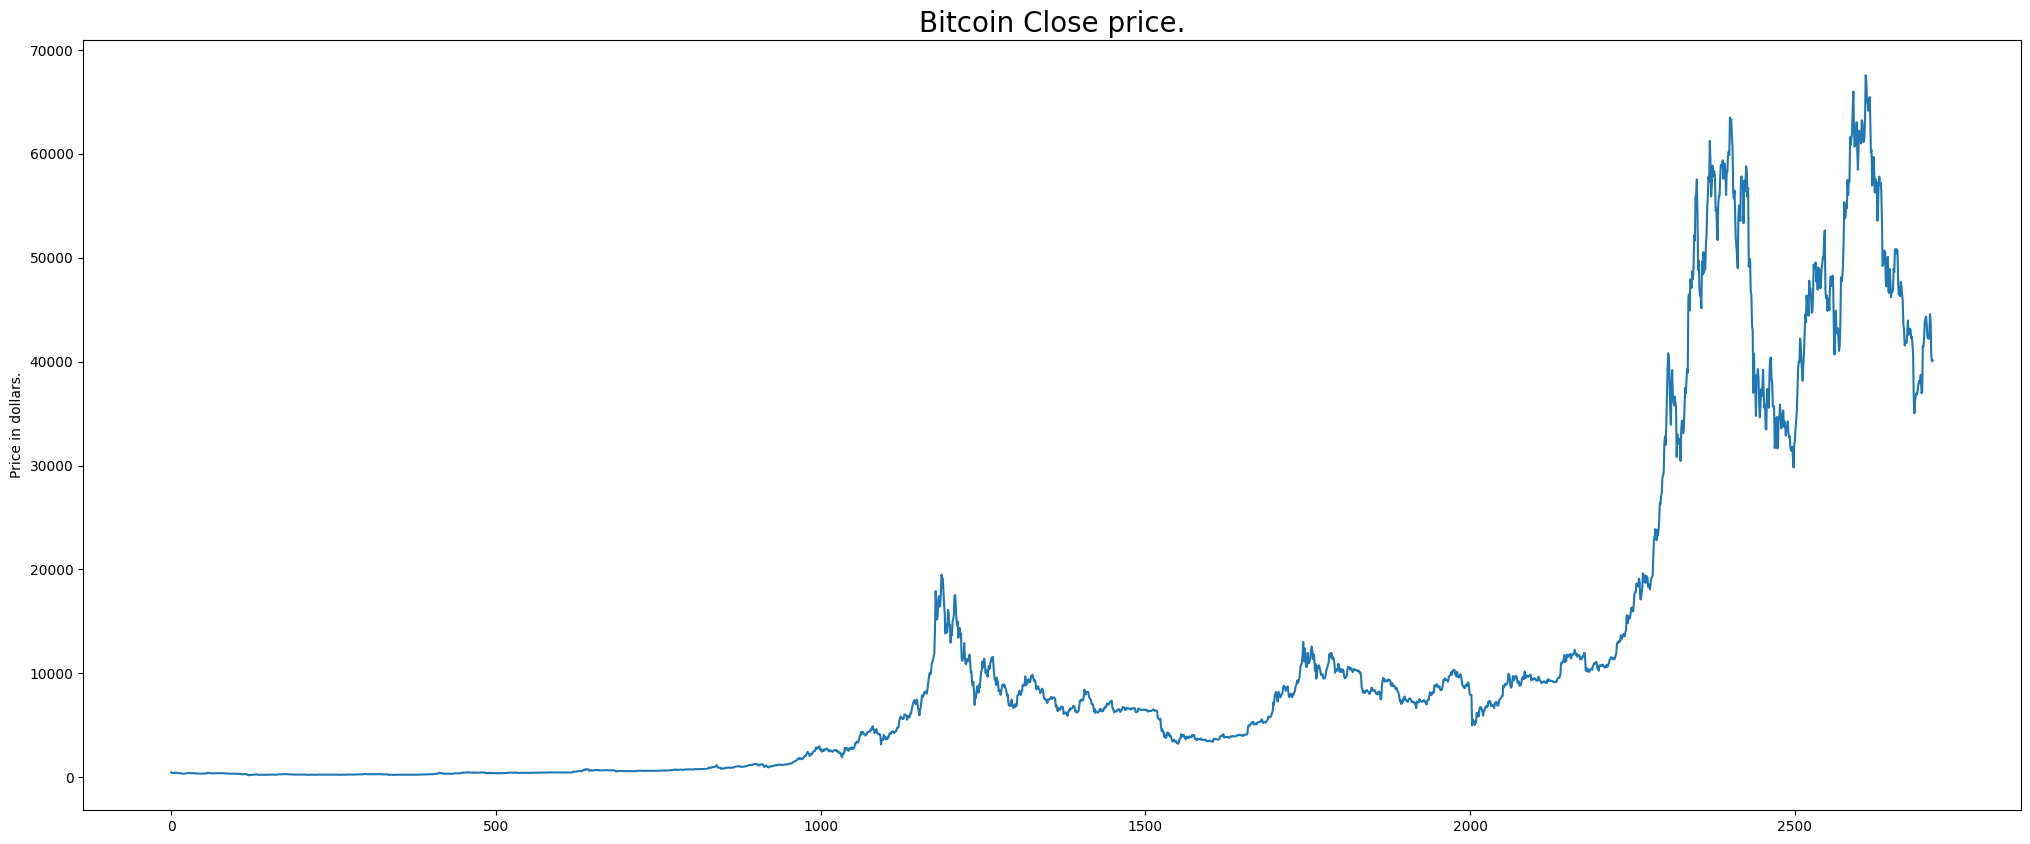

In [100]:
plt.figure(figsize=(25, 10))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=20)
plt.ylabel('Price in dollars.')
plt.show()

In [101]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2713, 7), (2713, 7))

In [102]:
df = df.drop(['Adj Close'], axis=1)

In [103]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


no null values found

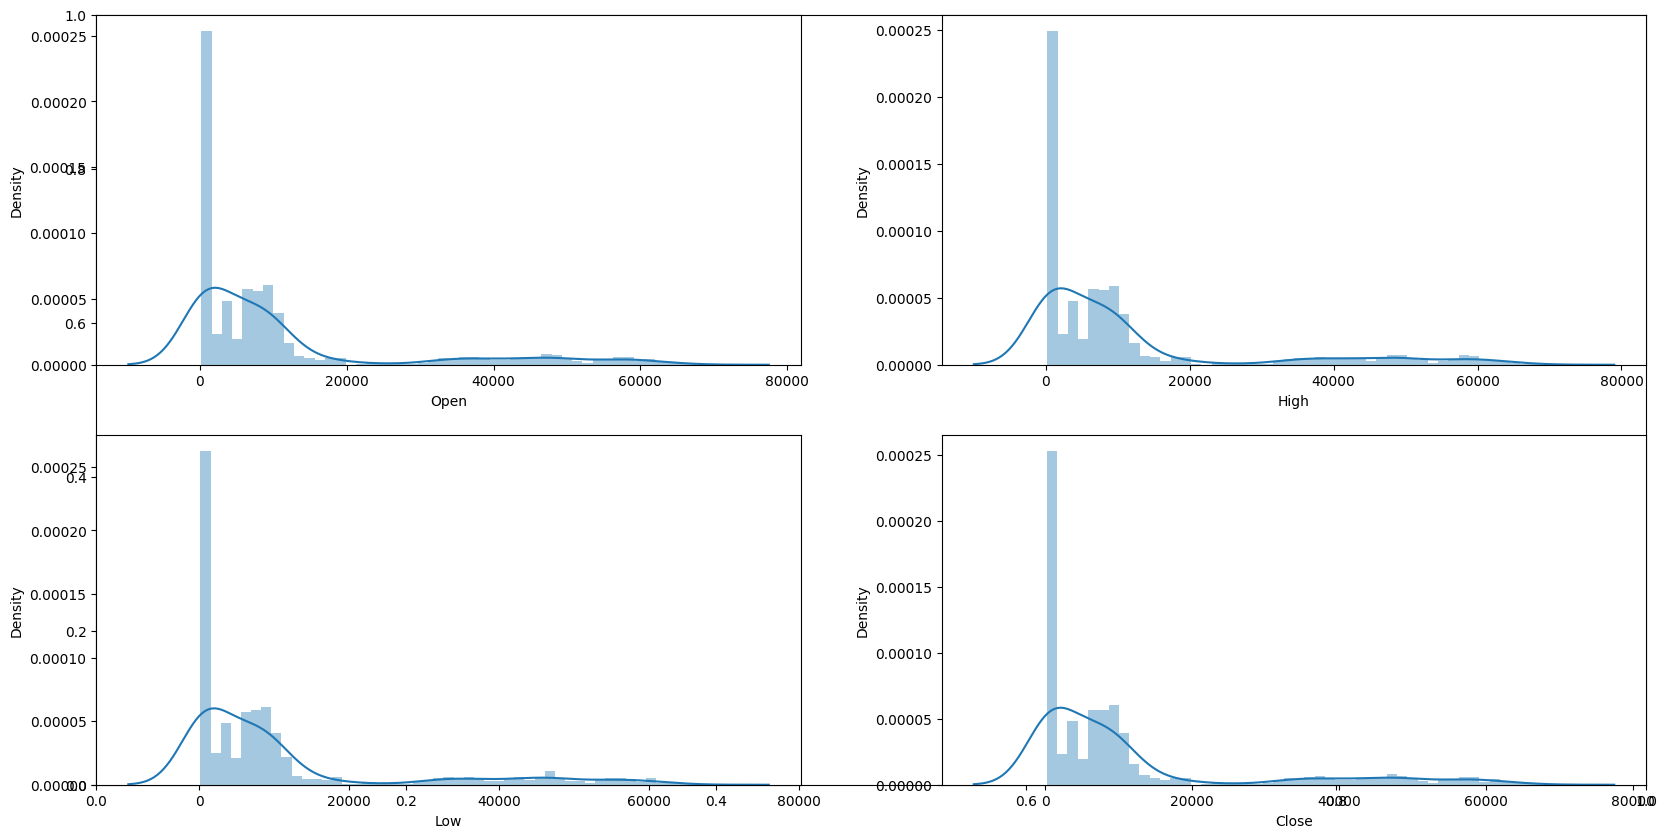

In [104]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

#INTERPRETATION
All four features (Open, High, Low, Close) exhibit right-skewed distributions.

Most of the data is concentrated at the lower price ranges (closer to 0–20,000 USD), while a long tail stretches toward higher prices (up to ~70,000+ USD).

All four price features (Open, High, Low, Close) show very similar distribution shapes, which is expected since they are closely related in any given trading day.

The majority of Bitcoin’s historical trading life was at much lower prices, reinforcing the idea that early investors had much lower entry points.

The long-tailed, skewed distribution is typical for financial assets that have experienced explosive growth.

This skewness also highlights why log transformation or normalization is often necessary before feeding this data into machine learning models.



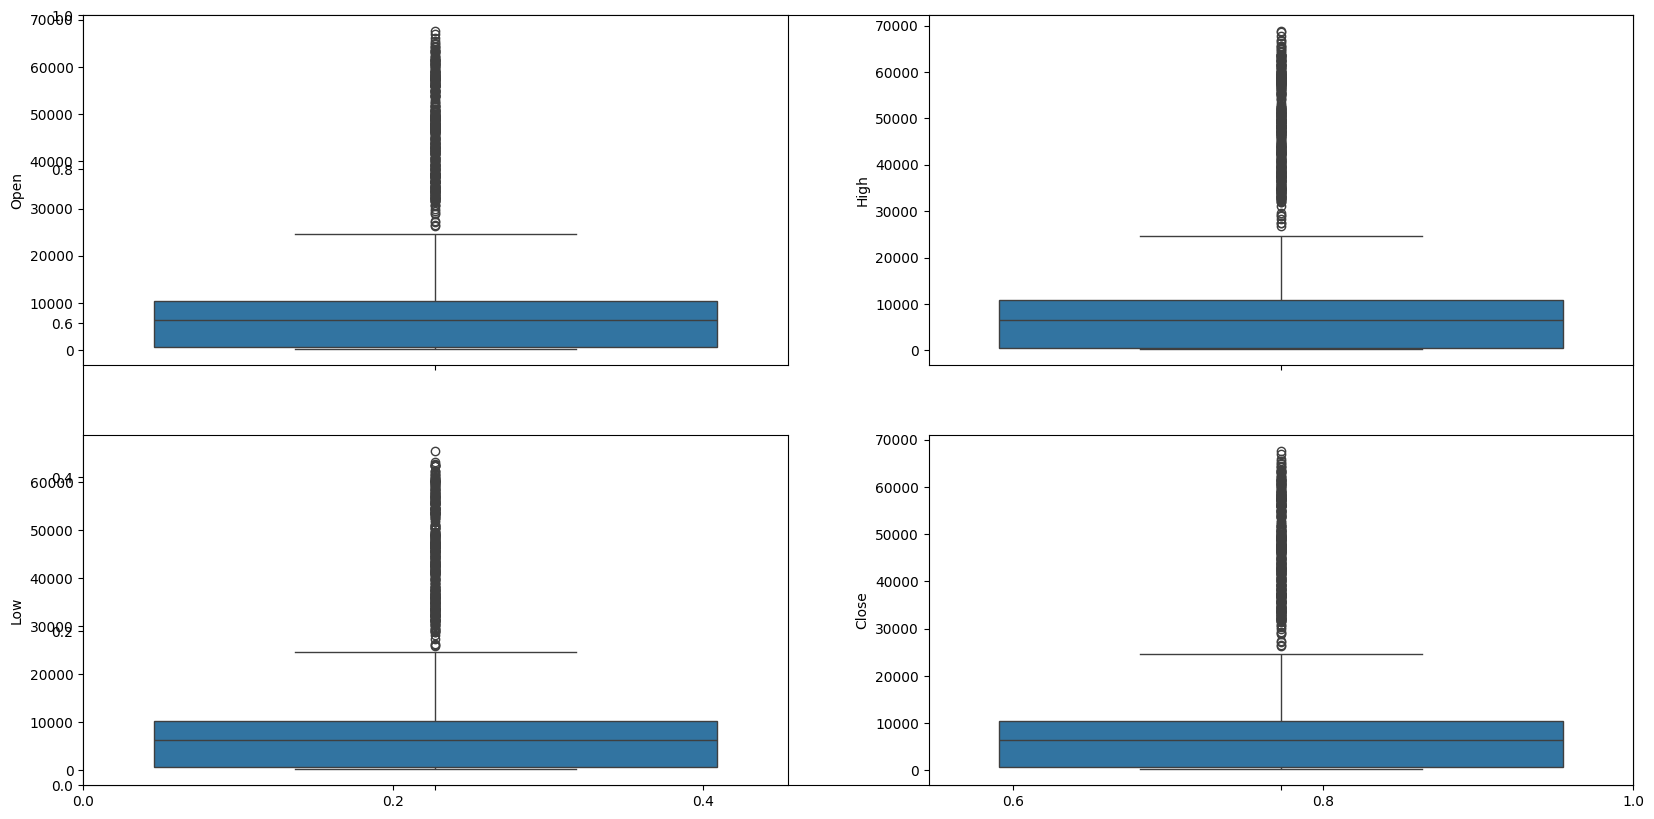

In [105]:
plt.subplots(figsize=(20,10))
# Use the original list of feature names for plotting
original_features = ['Open', 'High', 'Low', 'Close']
for i, col in enumerate(original_features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

#INTERPRETATION

The upper whiskers and a large number of extreme
outliers [dots above the upper whisker] suggest the presence of a long tail on the higher end of prices.

Massive number of outliers are observed above the upper whisker in each feature.

Median is relatively low compared to the spread.

Heavy outliers spike all the way up to nearly 700,000, which is quite far from the central tendency.

The spread is wide, and outliers go up to ~70,000.


The lower bound whisker starts very low, possibly near zero.




In [106]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


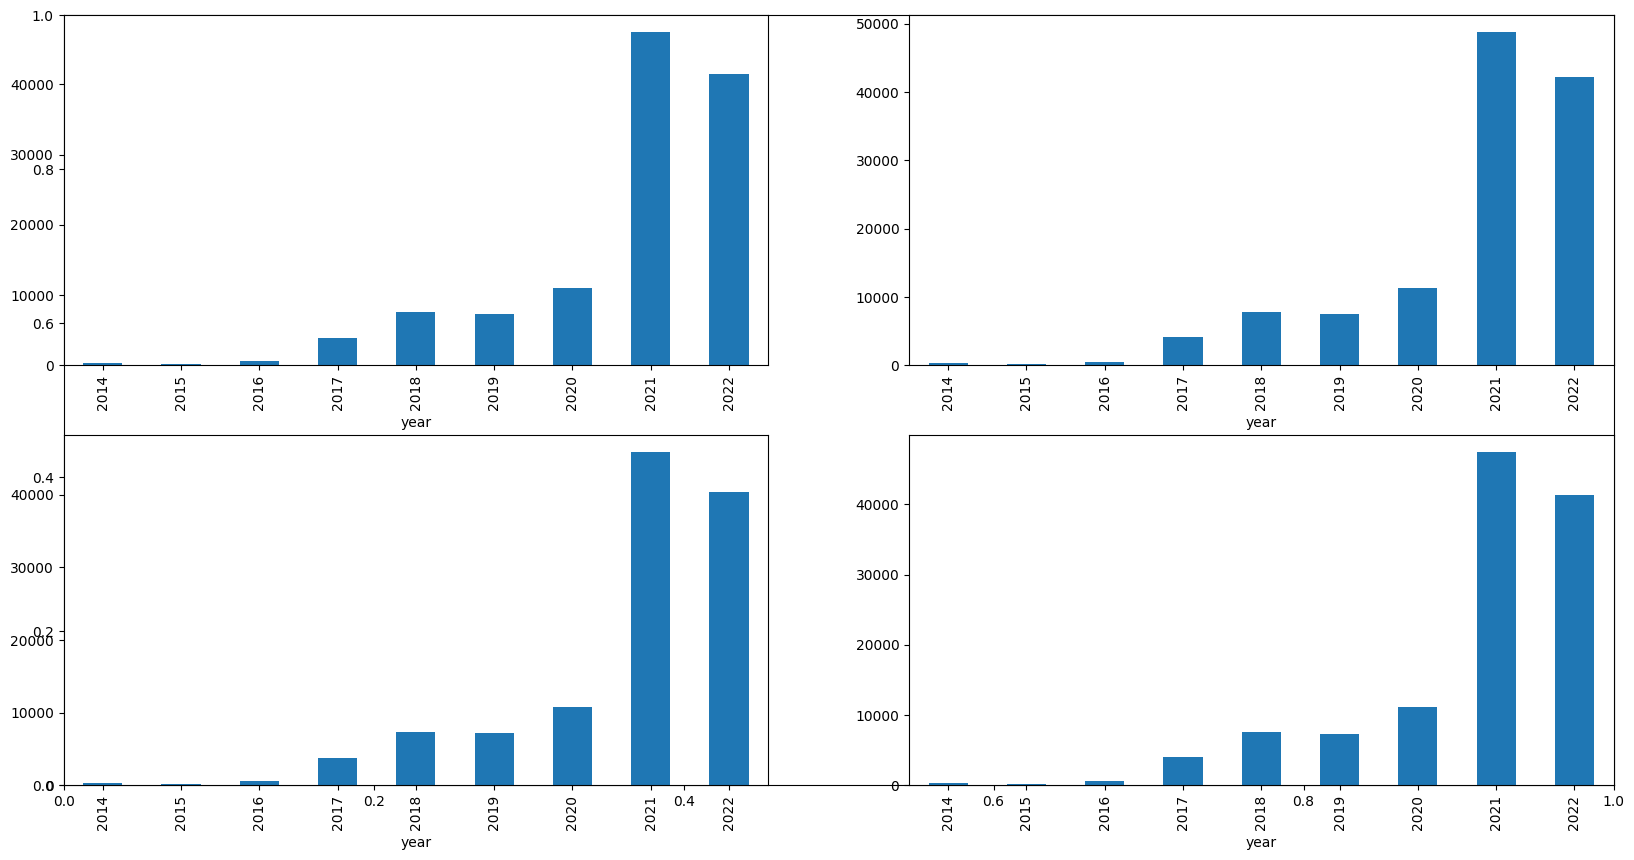

In [107]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

#INTERPRETATION
All the four features are steady rise untill 2020
The values are  ranging from near to zero in 2014 to around 10,000–15,000 by 2020.

A sudden upward trend happen  in 2021 across all four features.


This suggests a highly bullish market.

All metrics slightly decrease in 2022 compared to 2021.

Indicates  market pullback after the 2021 peak.


Market was stable from 2014 to 2019.

Sudden surge in 2021, possibly due to post-COVID recovery, retail investor boom, or macroeconomic changes.

Correction in 2022, indicating market stabilization or pullback.












In [108]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [109]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

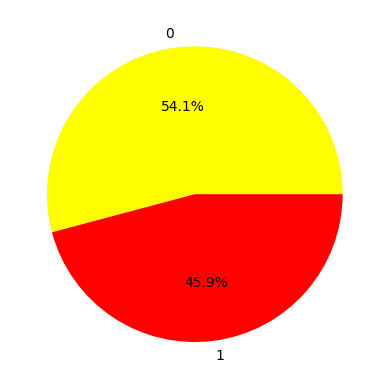

In [110]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1],
        autopct='%1.1f%%',
        colors=['yellow', 'red'])
plt.show()

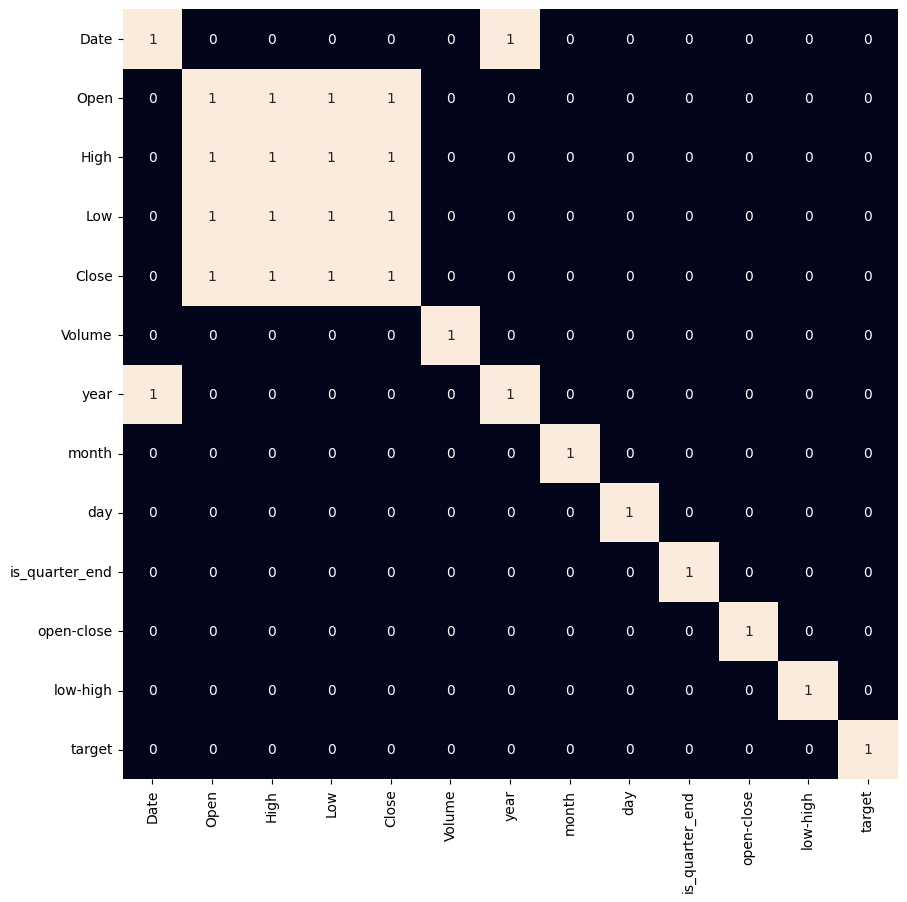

In [111]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [112]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

features = StandardScaler().fit_transform(features)

split = int(len(features) * 0.7)
X_train, X_valid = features[:split], features[split:]
Y_train, Y_valid = target[:split], target[split:]


In [113]:
models = [
    LogisticRegression(),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    KNeighborsClassifier()
]

for model in models:
    model.fit(X_train, Y_train)

    print(f'{model.__class__.__name__} :')
    print('Training ROC-AUC : ', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:,1]))
    print('Testing ROC-AUC : ', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:,1]))
    print()


LogisticRegression :
Training ROC-AUC :  0.5138858118556413
Testing ROC-AUC :  0.5401973672254093

GradientBoostingClassifier :
Training ROC-AUC :  0.8043225044141441
Testing ROC-AUC :  0.5192854070623301

AdaBoostClassifier :
Training ROC-AUC :  0.5503335504040424
Testing ROC-AUC :  0.5422934095824271

KNeighborsClassifier :
Training ROC-AUC :  0.744360637247991
Testing ROC-AUC :  0.4888958218485155



#INTERPRETATION
Model	Training ROC-AUC	     Testing ROC-AUC	Notes

*   
LogisticRegression
0.51(TRAIN)   0.54(TEST)(Likely underfitting.)  
*  GradientBoostingClassifier
0.80(TRAIN)                    0.52(TEST)(overfitting.)



*  AdaBoostClassifier
0.55(TRAIN)           	0.54(TEST)	Slightly better, but still low performance overall.

*  KNeighborsClassifier
 	0.749TRAIN)               0.49(TEST)	High training low testing severe overfitting


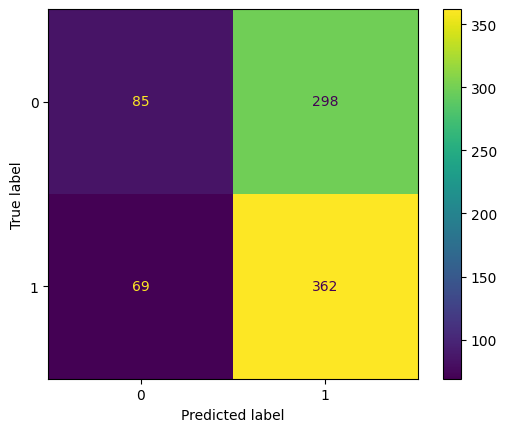

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

True Positives (362)
False Positives (298)
True Negatives (85)
False Negatives (69)
 large number of samples from class 0 were incorrectly predicted as 1. This suggests the model is biased toward predicting class 1.
Only 85 class 0 instances were correctly identified — this is relatively low, showing weak performance for class 0.

69 instances of class 1 were wrongly classified as 0, indicating room for improvement in positive class sensitivity.

## DONE BY MYNENI VINAY